# Model Selection for KNN

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Part 1. Build DataFrame and Define ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [2]:
filename = os.path.join(os.getcwd(), "..", "data", "cell2celltrain_cv.csv")

In [3]:
df = pd.read_csv(filename)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

Our features will be all of the remaining columns in the dataset.

## Part 2. Create Labeled Examples from the Data Set 

In [4]:
y = df['Churn']
X = df.drop(columns='Churn')
print(X.shape, y.shape)

(51047, 84) (51047,)


## Part 3. Create Training and Test Data Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1234)

## Part 4. Perform KNN Model Selection Using `GridSearchSV()`

Our goal is to find the optimal choice of hyperparameter $K$. We will then train a KNN model using that value of $K$.

In [8]:
num_examples = np.linspace(2, np.sqrt(X_train.shape[0]), num=10)
param_grid = {'n_neighbors': [int(num) for num in num_examples]}

param_grid

{'n_neighbors': [2, 25, 49, 72, 96, 119, 143, 167, 190, 214]}

### Perform Grid Search Cross-Validation

In [9]:
print('Running Grid Search...')

# 1. Create a KNeighborsClassifier model object without supplying arguments. 
#    Save the model object to the variable 'model'

model = KNeighborsClassifier()


# 2. Run a grid search with 5-fold cross-validation and assign the output to the object 'grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 5

grid = GridSearchCV(model, param_grid, cv=5)

# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'grid_search'

grid_search = grid.fit(X_train, y_train)


print('Done')

Running Grid Search...
Done


In [10]:
best_k = grid_search.best_params_
print(best_k)

{'n_neighbors': 96}


## Part 5. Train the Optimal KNN Model and Make Predictions

In [11]:
model_best = KNeighborsClassifier(best_k['n_neighbors'])

In [12]:
# 1. Make predictions on the test data using the predict_proba() method
model_best.fit(X_train, y_train)
probability_predictions = model_best.predict_proba(X_test)[:,1]
    
# 2. Make predictions on the test data using the predict() method 
class_label_predictions = model_best.predict(X_test)


## Part 6. Evaluate the Accuracy of the Model

In [13]:
acc_score = accuracy_score(y_test, class_label_predictions)
acc_score

0.7134182174338883

Create a confusion matrix to evaluate the model.

In [14]:
# Display a confusion matrix
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_test, class_label_predictions, labels=[True, False])

# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['Predicted: Positive', 'Predicted: Negative'],
index=['Actual: Positive', 'Actual: Negative']
)

Confusion Matrix for the model: 


,Predicted: Positive,Predicted: Negative
Actual: Positive,0,1463
Actual: Negative,0,3642


## Part 7.  Plot the Precision-Recall Curve 

In [15]:
from sklearn.metrics import precision_recall_curve

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)

The code cell below uses seaborn's `lineplot()` function to visualize the precision-recall curve. Variable `recall` will be on the $x$ axis and `precision` will be on the $y$-axis.

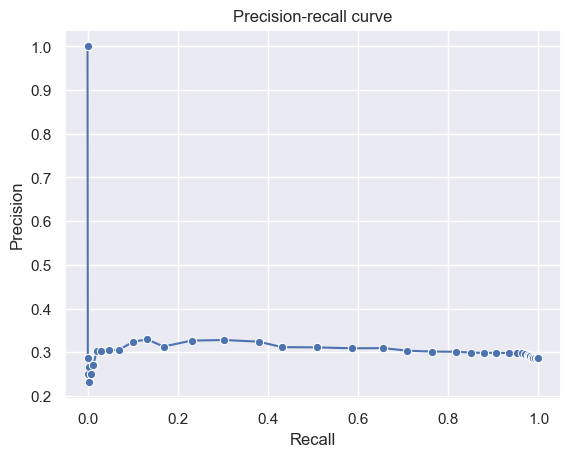

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall, y=precision, marker = 'o')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()